# Investigating Bikeshare Data
## by Hamad Waheed

## Preliminary Wrangling

> This data set is from lyfts bikesharing data from early 2017 to late 2018 and contains over half a million entries! The data of significance here is time started/ended, and locations for each and every entry.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [13]:
df = pd.read_csv('/Users/hamadwaheed/Desktop/2017-fordgobike-tripdata.csv')
df.head(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [14]:
df.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


## Cleaning

#### start_time and end_time are not timestamps

### Code

In [15]:
df_cleaned = df.copy()

In [16]:
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

#### Test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


#### adding columns for Month, Weekday, Hour

In [19]:
df_cleaned['start_time_month_name']=df_cleaned['start_time'].dt.strftime('%B')


In [20]:
df_cleaned['start_time_month']=df_cleaned['start_time'].dt.month.astype(int)

In [21]:
df_cleaned['start_time_weekday']=df_cleaned['start_time'].dt.strftime('%a')

In [22]:
df_cleaned['start_time_day']=df_cleaned['start_time'].dt.day.astype(int)

In [23]:
df_cleaned['start_time_hour']=df_cleaned['start_time'].dt.hour

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

###  structure of the dataset

> This dataset contains roughly half a million entries spanning from early 2017 to late 2018. Our variables of interest include the Month, Day, Hour, and user type.

###  main features of interest in the dataset

> The main area of interest is in what type of bike user is active during what time of the year and day

### features in the dataset that will support help the investigation 

> I think the demographics of time of year and day will contribute most to my findings

## Univariate Exploration
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

[Text(0.5, 1.0, 'Bikeshare by the Month')]

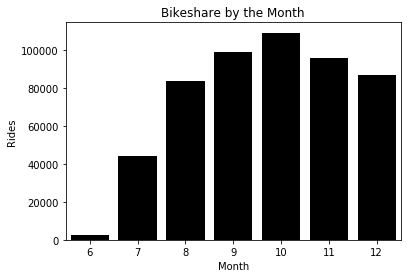

In [40]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = df_cleaned, x = 'start_time_month', color = 'black', ax = ax)
ax.set(xlabel="Month", ylabel = "Rides")
ax.set(title="Bikeshare by the Month")

#### From the above chart we can see that the most popular month for riders was October, followed closely by September, and then November. This is no surprise, we can infer that its too hot in the summertime and too cold as it approaches winter. Although that may be the case, it is surprising to see that November and December didn't fall to far behind october, and was significantly higher than earlier spring months. The data is definitely right skewed. 

[Text(0.5, 1.0, 'Bikeshare by the Hour')]

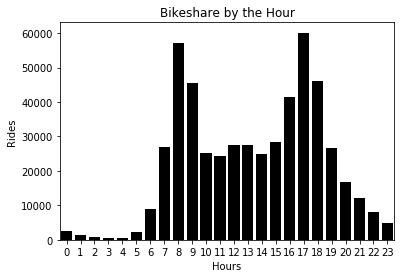

In [41]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = df_cleaned, x = 'start_time_hour', color = 'black', ax = ax)
ax.set(xlabel="Hours", ylabel = "Rides")
ax.set(title="Bikeshare by the Hour")

#### The prime hours for riders were 8 am and evening time. This is no surprise we can infer that people had to go to work and school therefore the rate is higher

[Text(0.5, 1.0, 'Bikeshare by the Week')]

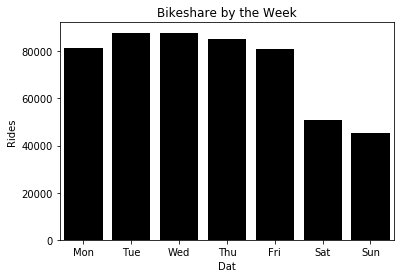

In [42]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = df_cleaned, x = 'start_time_weekday', color = 'black', ax = ax)
ax.set(xlabel="Dat", ylabel = "Rides")
ax.set(title="Bikeshare by the Week")

#### The weekdays had higher values of rides, we can infer that people had to go to work and school

###  distribution(s) of variable(s) of interest. 

> By the month was right skewed and everything else was left skewed except for daily hours. 



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [32]:
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_cleaned['bike_id'].count()
subscriber_proportion = subscriber / df_cleaned['bike_id'].count()

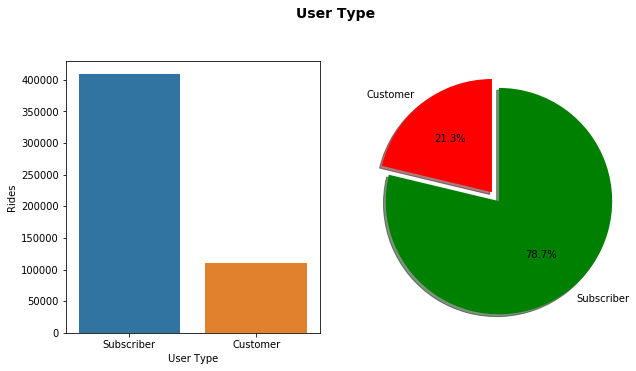

In [33]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_cleaned, x="user_type", order=df_cleaned.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Rides')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['red', 'green']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User Type', y=1.03, fontsize=14, fontweight='semibold');

[Text(0.5, 1.0, 'Monthly User Demographics')]

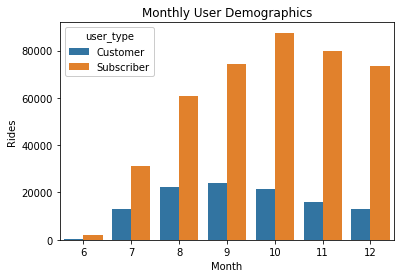

In [39]:
ax = sns.countplot(data = df_cleaned, x = 'start_time_month', hue = 'user_type')
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'user_type')
ax.set(xlabel="Month", ylabel = "Rides")
ax.set(title="Monthly User Demographics")


#### Just as anticipated the subscribers account for significantly more riders than customers. The ratio being at around 4/1 subscriber to consumer.

### Varying features of interest

> The aformentioned trends in day and time still apply with subscribers and consumers, although I would consider a disparity between the two I did not observe any. I would assume that subscribers would consider bikehsharing as per their routine, but even guests followed the same day and time trend



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(33.0, 0.5, 'Start Time')

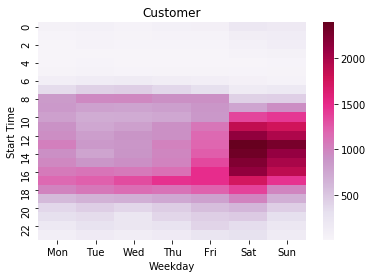

In [38]:
plt.subplot(1, 1, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="PuRd")

plt.title("Customer", y=.5)
plt.xlabel('Weekday')
plt.ylabel('Start Time')

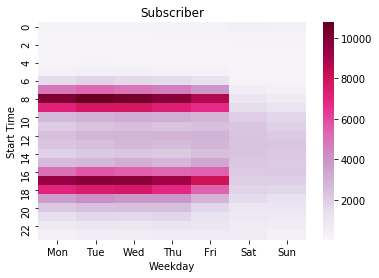

In [37]:
plt.subplot(1, 1, 1)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="PuRd")

plt.title("Subscriber", y=.5)
plt.xlabel('Weekday')
plt.ylabel('Start Time');

#### Here we can see a new observation in comparison to the earlier plots. The customer demographic is more active on the weekends and the subscriber is more active on the weekdays. Initially I thought the same trend occured with both demogrphics in terms of day and time but that is not the case. We can also tell that subscirbers still have far more numbers and follow a tight routine of typical workday commute hours.

### Observations

> The correlation between day/time and consumer/subscriber was revealed with more clarity here

### Interesting features

> its interesting to see how my initial thougts by observing univariate trends were proven wrong by the multivariate plots. Something I consdired self-evident was vastly wrong. 